In [ ]:
#Paketlərimizi import edirik
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import make_classification

In [ ]:
#Datamızı yaradırıq
X,y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42, n_clusters_per_class=1)

In [ ]:
#Datamızı iki hissəyə bölürük
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Modeli yaradıb öyrədib proqnozlaşdırırıq
model = SVC(kernel='linear', C = 1.0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
#Performansını qiymətləndirmək üçün dəqiqlik, təsnifat hesabatı və qarışıqlıq matrisi (confusion matrix) hesablayırıq
accuracy = accuracy_score(y_test,y_pred)
creport = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [ ]:
#Nəticələri çap edirik
print(f'Deqiqlik:\n{accuracy*100}%\nTesnifat Hesabati:\n{creport}')

Deqiqlik:
100.0%
Tesnifat Hesabati:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



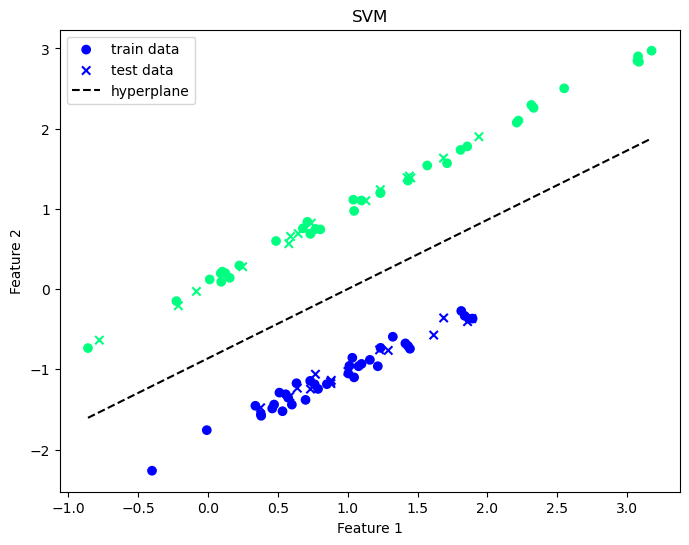

In [ ]:
#Və sonda görsəlləşdiririk
plt.figure(figsize=(8, 6))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="winter", label="train data")
plt.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, cmap="winter", marker="x", label="test data"
)
w = model.coef_[0]
b = model.intercept_[0]
x_line = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_line = -(w[0] * x_line + b) / w[1]
plt.plot(x_line, y_line, "k--", label="hyperplane")
plt.title("SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()